Avinash Lakshman & Prashant Malik initially developed the Cassandra at Facebook to power the Facebook inbox search feature. Facebook released Cassandra as an open source project on Google code in July 2008. In March 2009 it became an Apache Incubator project and in February 2010 it becomes a top-level project. Due to its outstanding technical features Cassandra became so popular.

 - **Apache Cassandra** is an **`open-source no SQL database`** that is used for handling big data.
 <br><br>
 - Apache Cassandra has the capability to handle **structure**, **semi-structured**, and **unstructured data**.
 <br><br>
 - Apache Cassandra was originally developed at Facebook after that it was open-sourced in 2008 and after that, it became one of the top-level Apache projects in 2010.

# Cassandra:

 - Query-wise, it has nature of SQL.
 - It has adopted the complete infra-structure of Big-Data or we can say HDFS file system.

In [1]:
## pip = "preferred installer python"

# !pip install cassandra-driver

In [2]:
import cassandra as cas

cas.__version__

'3.25.0'

## # Cassandra Features:

Apache Cassandra is a **highly scalable**, **distributed database** that strictly follows the principle of the **CAP (Consistency, Availability and Partition tolerance) theorem**.

The popularity of Cassandra is because of its unique features. These are:

 - **`High Scalability`**

Cassandra is highly scalable. High scalability allows the addition of additional hardware on requirement to attach additional customers and additional data.

 - **`Rigid Architecture`**

Cassandra has a **rigid architecture**. Without a single point of failure Cassandra facilitates continuous availability for business-critical applications. These types of applications in general cannot afford even a single point of failure and Cassandra makes sure of that.

 - **`Fast Performance`**

Cassandra facilitates a fast and linear scalable performance. The quick response time of Cassandra is because of its linear scalability which again adds to its fast performances.
Cassandra facilitates an increase in the number of nodes in the cluster which thus advances the throughput.

 - **`Fault-tolerant`**

Cassandra is **fault-tolerant**. With four nodes in a cluster, Cassandra becomes fault-tolerant as each node has a copy of the same data. If any of the four nodes is not working then the purpose can still be served by the other three nodes on request.

 - **`Flexibility in Data Storage`**

**Cassandra provides a flexibility in data storage.** Whether it is structured, semi-structured, or unstructured, Cassandra supports all possible data formats and also allows to make changes to any data structure.

 - **`Easy Data Distribution`**

Cassandra facilitates an easy way for **data distribution**. Also because of the flexibility in distributing data wherever needed, Data distribution in Cassandra becomes easy. The replication of data across multiple data centres is used to serve this purpose.

 - **`Transaction Support`**

Cassandra facilitates transaction support. Cassandra supports the ACID properties i.e, Atomicity, Consistency, Isolation, and Durability.

 - **`Fast writes`**

Cassandra is popular for its **fast writes** features. Along with the blazingly fast writes, Cassandra can also store hundreds of terabytes of data. But the read efficiency is not sacrificed and thus is the best choice to run on cheap commodity hardware.

### # To operate the Cassandra Console `cqlsh` in cmd:

- Open the cmd in admin mode.
- Get into the bin directory of cassandra.
- Run **cassandra.bat -h** in cmd.
- If the startup is complete, open a new window of anaconda prompt.
- Change the python environment and set it to any version below python3 -- `conda activate env_name`
- Now run **cqlsh**.
- Now, your cassandra console is ready to fire some queries.

Establishing Connestion:

In [3]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config = {
    'secure_connect_bundle': 'secure-connect-cassandra-tutorial.zip'
}
auth_provider = PlainTextAuthProvider(
    'fcvBmNLRmCdfXYuTkeZZedtZ', 
    'U.jS0oFiT739KE9wUPHNrrbCtH9axPS15dsTDmQ6Q62Mgw7TXIfbmdNE2NhKtppxo3ZfF8pMX3Sod5XaQiuC,G9Ag1QFofJru9_3G8y-iOvecKhoQvFgAJLJFxL6u.+2')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()  # can also pass `keyspace_name` here

row = session.execute("select release_version from system.local").one()
if row:
    print("release_version: ", row)
else:
    print("An error occurred.")

release_version:  Row(release_version='4.0.0.6816')


### # Create a `keyspace` in the selected database

- A **`keyspace`** is an object that is used to hold column families, user defined types.
<br><br>
- Creating a keyspace is the CQL counterpart to creating an SQL database.

**CREATE KEYSPACE lucy WITH replication = {'class': 'SimpleStrategy', 'replication_factor' : 4} AND durable_writes='true';**

In [4]:
## Create a keyspace in selected database

try:
    row = session.execute("CREATE KEYSPACE hell WITH replication = {'class': 'SimpleStrategy', 'replication_factor' : 1} AND durable_writes='true';").one()
    print(row)
except Exception as e:
    print(e)

Error from server: code=2100 [Unauthorized] message="Missing correct permission on hell.: Keyspace management is currently only supported at https://astra.datastax.com/org/9c7ac7f3-996c-41cd-ae7b-e33195f4abc6/database/6b60bd09-2d54-4eae-ab48-d7a4f7ece6c3"


**Note**: **Durable Writes** provides a means to instruct Cassandra whether to use **"commitlog"** for updates on the current KeySpace or not.

`USE <<keyspace_name>>;`

In [5]:
## Use `keyspace_name`

row = session.execute("USE silver_city;").one()
row

## # Replication strategies in Cassandra:


**SimpleStrategy, LocalStrategy** and **NetworkTopologyStrategy** are three Replication strategies in which we generally use Simple and NetworkTopology Strategy. **LocalStrategy** is used for system only.

- **`SimpleStrategy`**

It is a simple strategy that is **recommended for multiple nodes over multiple racks in a single data center.**

Let’s consider taking an example, **strategy_demo** is a keyspace name in which class is SimpleStrategy and replication_factor is 2 **which simply means there are two redundant copies of each row in a single data center.**

Creating a keyspace:

**`CREATE KEYSPACE <<keyspace_name>> WITH`**<br>
**`replication = {'class': 'SimpleStrategy', 'replication_factor' : 2};`**

**Note:** In this example, we define RF (Replication Factor) as 3 which simply means that we are creating here 3 copies of data across multiple nodes in a clockwise direction.

 - **`LocalStrategy`**
 
**It is the strategy in which we will use a replication strategy for internal purposes such as for system and sys_auth keyspaces which are our internal keyspaces.**
<br>
In Cassandra internal keyspaces are implicitly handled by Cassandra’s storage architecture for managing authorization and authentication.

It is not permissible to create a keyspace with LocalStrategy class. If we will try to create such keyspace then it would give an error like **“LocalStrategy is for Cassandra’s internal purpose only”**.

 - **`NetworkTopologyStrategy`**
 
**It is the strategy in which we can store multiple copies of data on different data centers as per need.** 
**When multiple replica nodes need to be placed on different data centers**, one should go with **NetworkTopologyStrategy**.

Let’s consider an example, cluster1 is a keyspace name in which NetworkTopologyStrategy is a replication strategy and there are two data centers one is east with RF( Replication Factor) = 2 and second is west with RF( Replication Factor) = 3.

**`CREATE KEYSPACE <<keyspace_name>> WITH`**<br>
**`replication = {'class': 'NetworkTopologyStrategy', 'east' : 2, 'west' : 3};`**

`DESC <<keyspace_name>>;`

In [7]:
try:
    row = session.execute("DESC silver_city;").one()
    print(row)
except Exception as e:
    print(e)

<Error from server: code=2000 [Syntax error in CQL query] message="line 1:0 no viable alternative at input 'DESC' ([DESC]...)">


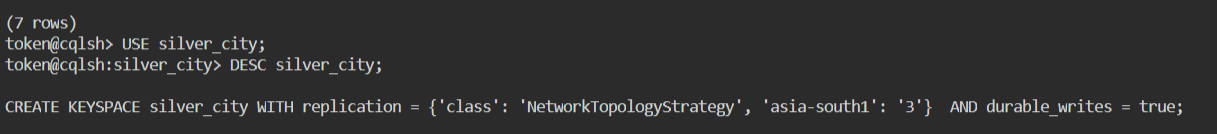

`SELECT * FROM system_schema.keyspaces`

In [8]:
try:
    row = session.execute("SELECT * FROM system_schema.keyspaces").one()
    print(row)
except Exception as e:
    print(e)

Row(keyspace_name='system_auth', durable_writes=True, graph_engine=None, replication=OrderedMapSerializedKey([('asia-south1', '3'), ('class', 'org.apache.cassandra.locator.NetworkTopologyStrategy')]))


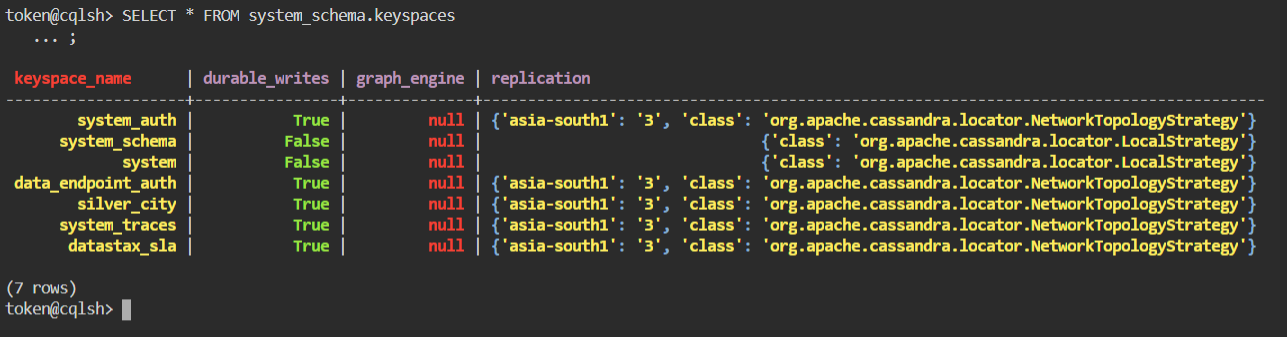

### # Creating a table in a keyspace:

In [18]:
## Primary here means that duplicate records won't be allowed to be inserted.

try:
    row = session.execute(
        """
        create table if not exists magic_knights(
        id int primary key,
        knight_name text,
        mana_attribute text,
        ranking text,
        );
        """).one()
    print(row)
    
except Exception as e:
    print(e)

None


### # Inserting records into a table:

Local:

In [20]:
try:
    row = session.execute(
        """
        insert into magic_knights (id, knight_name, mana_attribute, ranking)
        values 
        (1, 'Julius Novachrono', 'time manipulation', 'Wizard King');
        """).one()
    print(row)
    
except Exception as e:
    print(e)

None


In [21]:
try:
    row = session.execute(
        """
        insert into magic_knights (id, knight_name, mana_attribute, ranking)
        values 
        (2, 'Yami Sukehiro', 'dark magic', 'Captain');
        """).one()
    print(row)
    
except Exception as e:
    print(e)

None


In [22]:
try:
    row = session.execute(
        """
        insert into magic_knights (id, knight_name, mana_attribute, ranking)
        values 
        (3, 'Fuegoleon Vermillion', 'flame magic', 'Captain');
        """).one()
    print(row)
    
except Exception as e:
    print(e)

None


In [23]:
try:
    row = session.execute(
        """
        insert into magic_knights (id, knight_name, mana_attribute, ranking)
        values 
        (4, 'Mereleona Vermillion', 'flame magic', 'Royal Knights Captain');
        """).one()
    print(row)
    
except Exception as e:
    print(e)

None


`SELECT * FROM magic_knights;`

In [27]:
try:
    row = session.execute("SELECT * FROM magic_knights;").one()
    print(row)
    
except Exception as e:
    print(e)

Row(id=1, knight_name='Julius Novachrono', mana_attribute='time manipulation', ranking='Wizard King')


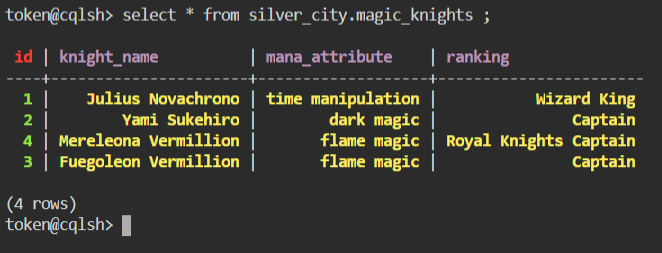

In [28]:
try:
    row = session.execute(
        """
        CREATE KEYSPACE Hell
        WITH replication = {'class': 'NetworkTopologyStrategy', 'replication_factor': '3'};
        """).one()
except Exception as e:
    print(e)

Error from server: code=2100 [Unauthorized] message="Missing correct permission on hell.: Keyspace management is currently only supported at https://astra.datastax.com/org/9c7ac7f3-996c-41cd-ae7b-e33195f4abc6/database/6b60bd09-2d54-4eae-ab48-d7a4f7ece6c3"


### Note:

It is not possible to configure the replica count to 1 **because it breaks the guarantees that Cassandra provides for high availability.** With 3 replicas in each DC, the application can tolerate an outage to a node with LOCAL_QUORUM consistency.

But if you look closely, the error isn't because you tried to create a keyspace with just 1 replica. It failed because you're not authorised to create keyspaces via cqlsh:

[Unauthorized] message = "Missing correct permission on hashirama."
<br><br>
**=> Creating keyspaces via the Astra CQL console is not allowed. Instead, you have to add a new keyspace through the Dashboard UI by clicking on the Add Keyspace button.**

### # Using keyspace "lucy":

Creating a table:

In [30]:
## Create a table "web_info" inside the keyspace 'lucy'

session.execute(
    """
    CREATE TABLE lucy.web_info (
    url text,
    user_id uuid,
    net_location inet,
    visitor_info text,
    PRIMARY KEY (url, net_location));
    """)

**Note:** `Inet` data type in **Cassandra Query Language ( CQL)** is used to store IPV4 and IPV6 IP Addresses. You will be storing the information as string.

In [31]:
session.execute(
    """
    Insert into lucy.web_info(url, user_id, net_location, visitor_info)
    values('https://www.google.com', uuid(), '127.0.0.1', 'Lucy');
    """)   
 
session.execute(
    """
    Insert into lucy.web_info(url, user_id, net_location, visitor_info)
    values('https://www.amazon.com', uuid(), '127.0.0.4', 'Spidey');
    """)    
 
session.execute(
    """
    Insert into lucy.web_info(url, user_id, net_location, visitor_info)
    values('https://www.youtube.com', uuid(), '127.0.0.2', 'Suryansh Grover');
    """)

session.execute(
    """
    Insert into lucy.web_info(url, user_id, net_location, visitor_info)
    values('https://www.silvercity.com', uuid(), '127.0.0.3', 'Lucifer Morningstar');
    """) 

In [34]:
row = session.execute("SELECT * FROM lucy.web_info LIMIT 2;").one()
row

Row(url='https://www.amazon.com', net_location='127.0.0.4', user_id=UUID('73d6f682-2906-4a8f-9ca6-dcff7c09187d'), visitor_info='Spidey')

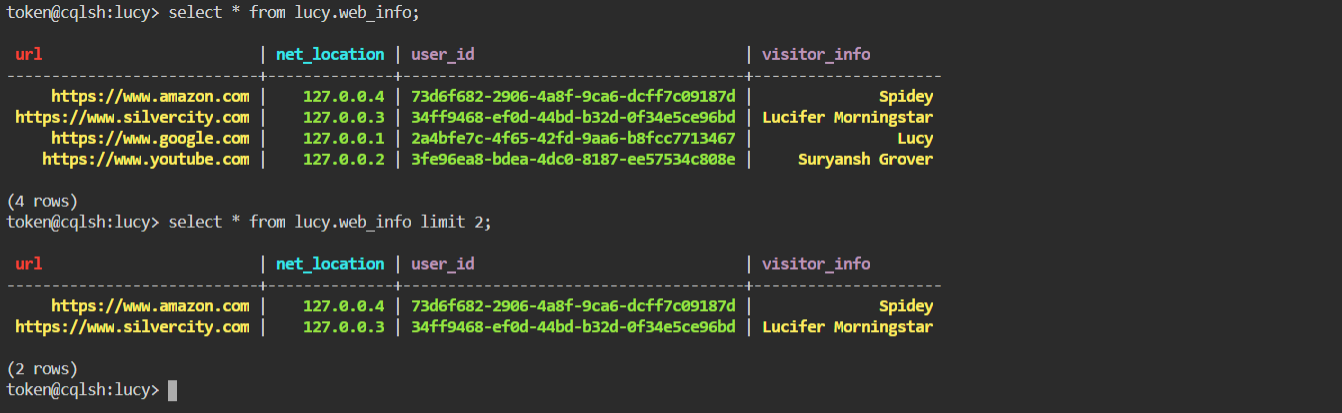

### # Allow Filtering:

This is option is very useful in CQL which has the ability for the server to actively filter out the results.

In [35]:
session.execute(
    """
    SELECT * FROM lucy.web_info
    WHERE url='https://www.google.com'
    AND net_location='127.0.0.1' AND visitor_info = 'Lucy'
    ALLOW FILTERING;
    """).one()

Row(url='https://www.google.com', net_location='127.0.0.1', user_id=UUID('2a4bfe7c-4f65-42fd-9aa6-b8fcc7713467'), visitor_info='Lucy')

In [37]:
## Without using `ALLOW FILTERING`

try:    
    session.execute(
        """
        SELECT * FROM lucy.web_info
        WHERE url='https://www.google.com'
        AND net_location='127.0.0.1' AND visitor_info = 'Lucy';
        """).one()
except Exception as e:
    print(e)

Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"


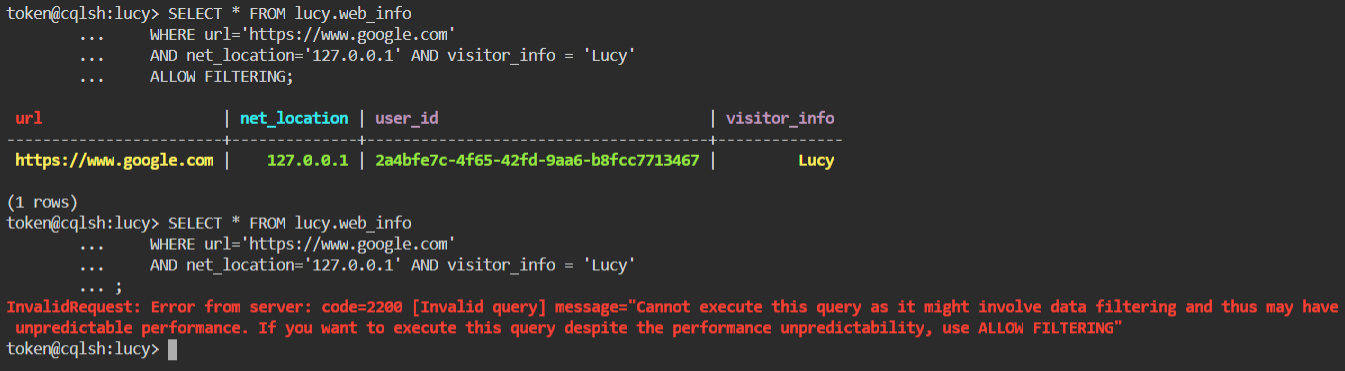

### # BATCH query:

Here, just gonna demonstrate how the **BATCH CQL query** is useful in Cassandra. In below given example we are just showing that how we can update, delete and inserted data into the table using BATCH (Kinda like bulk edit operations).

In [38]:
session.execute(
    """
    BEGIN BATCH
    UPDATE lucy.web_info USING TTL 345600
    SET visitor_info = 'NARUTO UZUMAKI'
    WHERE url='https://www.google.com' and net_location = '127.0.0.1';
    
    Delete visitor_info FROM lucy.web_info
    WHERE url='https://www.google.com' and net_location = '127.0.0.1';
    
    Insert into lucy.web_info(url, user_id, net_location, visitor_info)
    values('https://www.geeksforgeeks.com', uuid(), '127.0.0.5', 'Chloe Decker');
    
    APPLY BATCH;
    """).one()

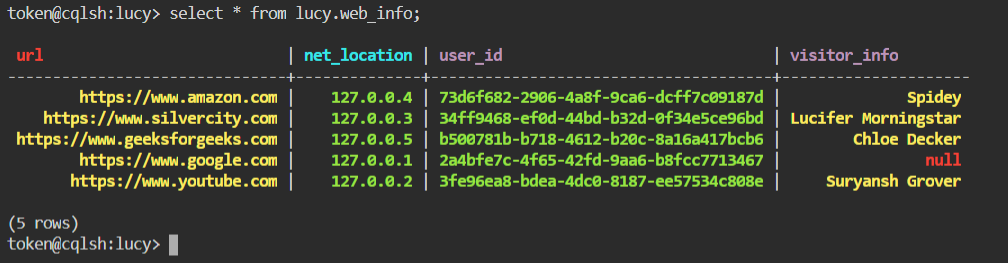

### # TTL:

**In Cassandra Both the INSERT and UPDATE commands support setting a time for data in a column to expire.** It is used to set the time limit for a specific period of time. By USING **TTL (Time To Live)** clause we can set the TTL value at the time of insertion. We can use TTL function to get the time remaining for a specific selected query.

In Cassandra, **Time to Live (TTL)** plays an important role like **if or when we want to set the time limit of a column and we want to automatically delete after a point of time** then at the time using TTL keyword is very useful to define the time limit for a particular column.

 - We can use TTL function to get the time remaining for a specific selected query.
 
 - At the point of insertion, we can set expire limit of inserted data by using TTL clause. 
 
 - Let us consider if we want to set the expire limit to two days then we need to define its TTL value. **By using TTL we can set the expiration period to two days and the value of TTL will be 172800 seconds.**
 

### # uuid()

 - One of the reasons of using uuid() function is to generate Unique ID which helps in avoiding collisions.
<br><br>
 - The uuid() function is suitable for use in insert or update statements and uuid() function takes no parameter value to generate a unique random Type 4 UUID value which is guaranteed unique value.